In [ ]:
!python -m pip install statsmodels

In [ ]:
!python --version

Python 3.10.12


In [ ]:
# Nos vinculamos a nuestro drive, para poder usar facilmente GColab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Parte 1 - Importamos las librerias necesarias.

In [ ]:
# Importación de las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parte 2 - Tratamiento de datos y generacion de los datasets.

In [ ]:
# Notas:
# parse_dates: Especifica la columna que contiene la información de fecha y hora.
# index_col:   El índice debe ser la variable que representa la información de fecha y hora.
# date_parser: Especifica una función que convierte una cadena de entrada en variable de fecha y hora. Por defecto, Pandas lee los datos en formato "AAAA-MM-DD HH: MM: SS".
# Si los datos no están en este formato, el formato debe definirse manualmente.

In [ ]:
# Importamos el set de datos!

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DMC/Deep_Learning/Clase 08/RetoAplicacion_TELEFBC1.csv',
                parse_dates=['Date'],
                dayfirst=True,
                index_col='Date')
df

,Close,Volumen
Date,,
2012-01-02,2.45,6622
2012-01-03,2.45,10629
2012-01-04,2.47,1745
2012-01-05,2.47,2543
2012-01-06,2.47,11207
...,...,...
2019-04-24,0.71,43686
2019-04-25,0.70,21271
2019-04-26,0.72,20300


In [ ]:
# Revisamos la cantidad de elementos del dataset!
df.shape

(1832, 2)

In [ ]:
# Vemos un poco la estructura de datos!
df.head(10)

,Close,Volumen
Date,,
2012-01-02,2.45,6622
2012-01-03,2.45,10629
2012-01-04,2.47,1745
2012-01-05,2.47,2543
2012-01-06,2.47,11207
2012-01-09,2.52,38554
2012-01-10,2.55,3039
2012-01-11,2.60,35946
2012-01-12,2.55,4304


In [ ]:
# En caso de ser necesario ordenamos los registros por fecha.
df.sort_values('Date', inplace=True, ascending=True)

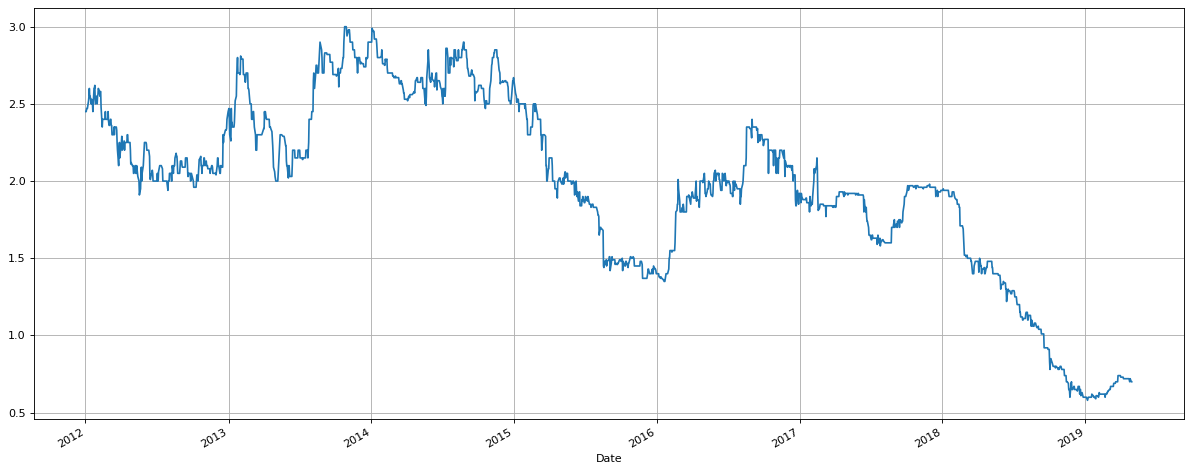

In [ ]:
# Visualizamos la informacion del conjunto de datos!
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
df['Close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

# Conclusiones:
# Zt = T + e + C + a
# Tendencia deterministica de tipo lineal creciente!
# Estacionalidad muy marcada!

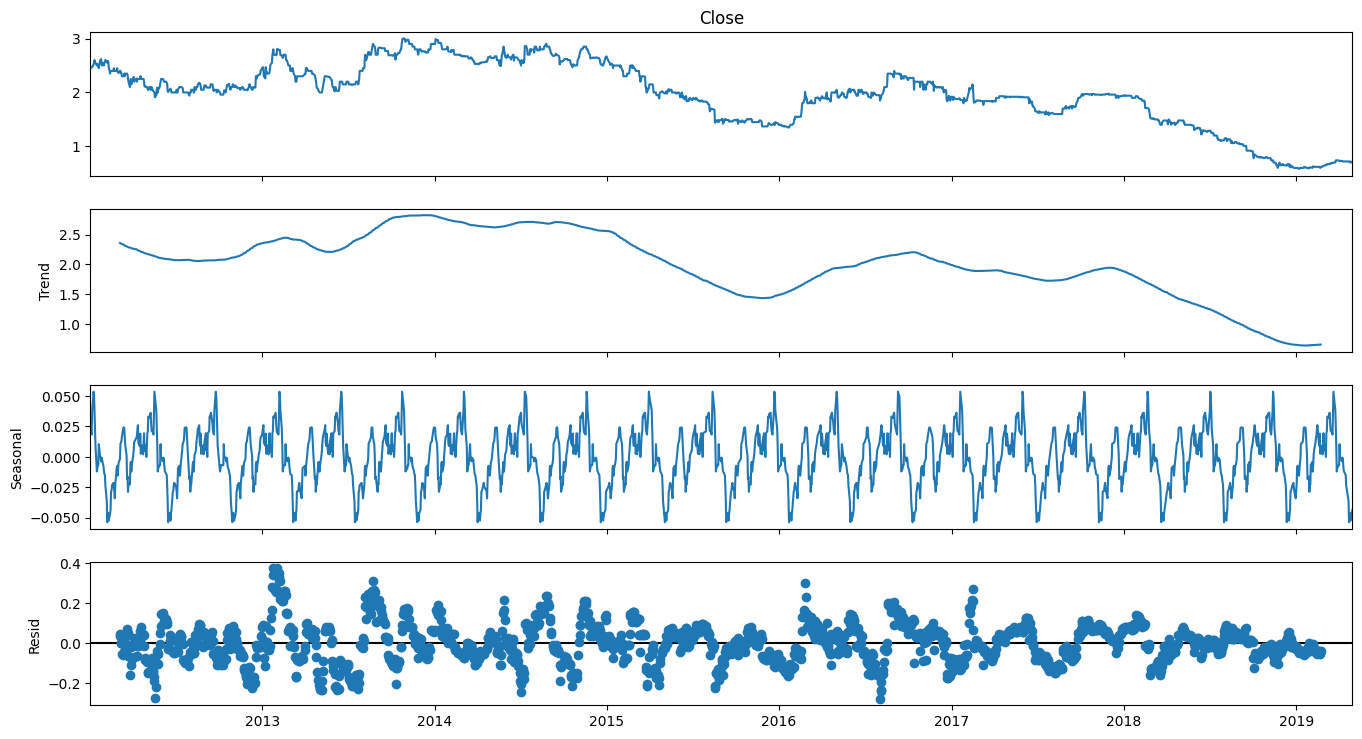

In [ ]:
# Descomposición de la serie de tiempo

import statsmodels.api as sm
import matplotlib.pyplot as plt
res = sm.tsa.seasonal_decompose(df['Close'],period=90)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [ ]:
# Deep Learning --> Machine Learning!

In [ ]:
df.describe()

,Close,Volumen
count,1832.000000,1.832000e+03
mean,1.980993,9.336964e+05
std,0.585625,3.924261e+07
min,0.580000,1.432000e+03
25%,1.650000,4.334250e+03
50%,2.000000,8.410500e+03
75%,2.400000,1.777775e+04
max,3.000000,1.679673e+09


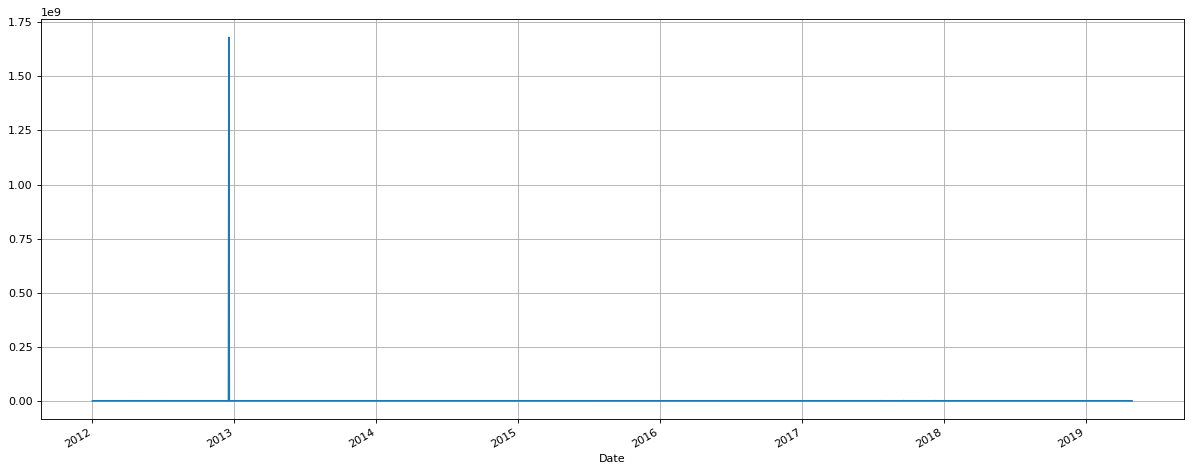

In [ ]:
# Visualizamos la informacion del conjunto de datos!
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
df['Volumen'].plot()
plt.tight_layout()
plt.grid()
plt.show()

# Conclusiones:
# Zt = T + e + C + a
# Tendencia deterministica de tipo lineal creciente!
# Estacionalidad muy marcada!

In [ ]:
# Supongamos que tienes un DataFrame df con una columna 'Valor'
# Calcula la media y la desviación estándar de la columna 'Valor'
mean = df['Volumen'].mean()
std = df['Volumen'].std()

# Define un umbral (por ejemplo, 3 veces la desviación estándar)
threshold = 3 * std

# Filtra los valores atípicos basados en el umbral
df = df[abs(df['Volumen'] - mean) <= threshold]



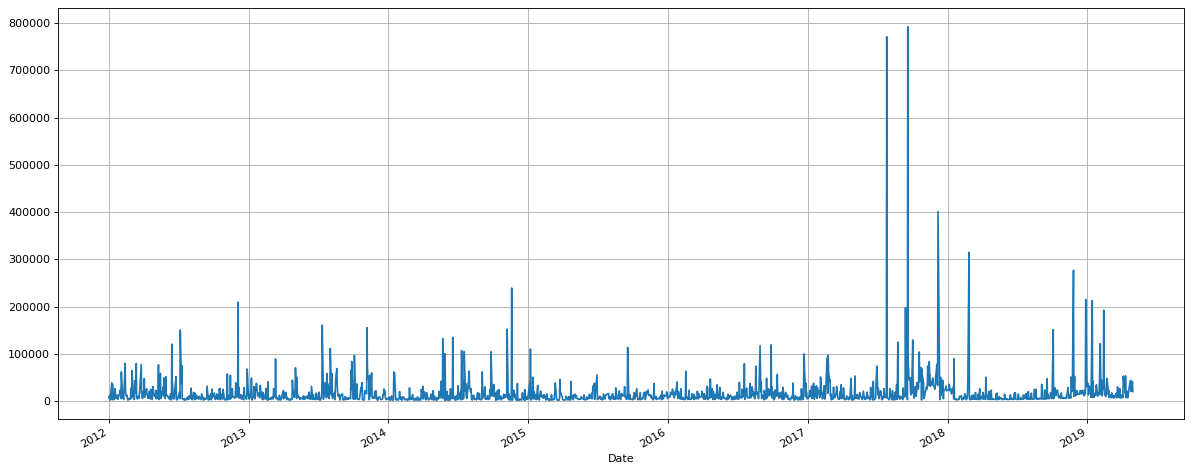

In [ ]:
# Visualizamos la informacion del conjunto de datos!
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
df['Volumen'].plot()
plt.tight_layout()
plt.grid()
plt.show()

# Conclusiones:
# Zt = T + e + C + a
# Tendencia deterministica de tipo lineal creciente!
# Estacionalidad muy marcada!

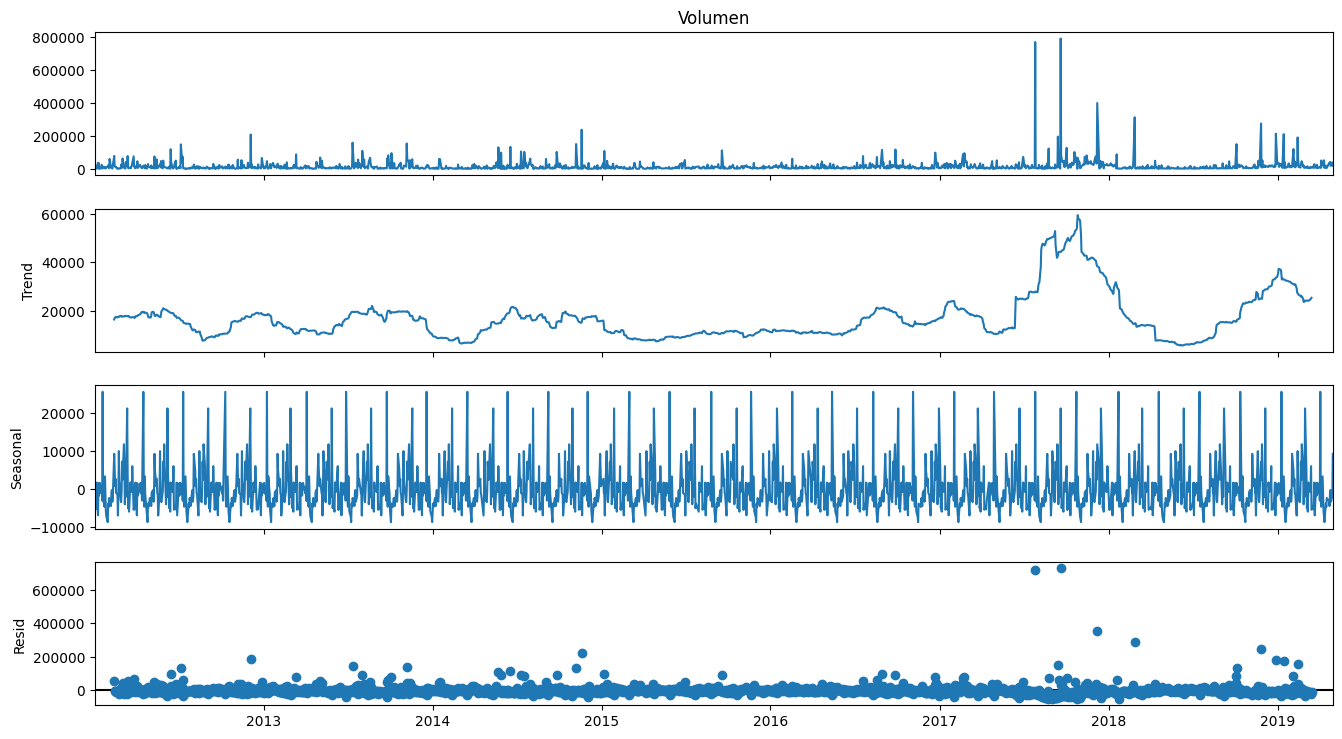

In [ ]:
# Descomposición de la serie de tiempo

import statsmodels.api as sm
import matplotlib.pyplot as plt
res = sm.tsa.seasonal_decompose(df['Volumen'],period=60)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

# **Modelo 01**

In [ ]:
# Machine Learning , X  -->  y
# Train - Test

# En series de tiempo generalmente se hace un particion distinta!
# Seamos cuidadosos y no es igual al train test split!
train, test = df[['Close']].iloc[0:-100], df[['Close']].iloc[-100:len(df)]
print(len(train), len(test))


1731 100


In [ ]:
test.head(5)

,Close
Date,
2018-12-06,0.65
2018-12-07,0.65
2018-12-10,0.65
2018-12-11,0.65
2018-12-12,0.64


In [ ]:
# Importante!
# En series de tiempo es necesario escalar las variable o caracteristicas!
# Para escalar puedes usar normalización,estandarización u otro tipo de escalado.
train_max = train.max()
train_min = train.min()

In [ ]:
train_min

Close    0.6
dtype: float64

In [ ]:
# Normalizamos los set de datos, train y test!
# Pueden utilizar la metodologia de escalamiento que deseen!
train_set_scaled = (train - train_min)/(train_max - train_min)
test_set_scaled = (test - train_min)/(train_max - train_min)

In [ ]:
# Revisamos el escalado!
train_set_scaled.head(10)

,Close
Date,
2012-01-10,0.812500
2012-01-11,0.833333
2012-01-12,0.812500
2012-01-13,0.812500
2012-01-16,0.791667
2012-01-17,0.804167
2012-01-18,0.791667
2012-01-19,0.791667
2012-01-20,0.770833


In [ ]:
train_set_scaled.shape

(1726, 1)

In [ ]:
# Definimos la funcion de la arquitectura X - y.
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
# Definimos un time_step y procedemos a crear los dataframes!
time_steps = 1 # Comencemos un vector unitario

X_train, y_train = create_dataset(train_set_scaled, train_set_scaled['Close'] , time_steps)
X_test,  y_test  = create_dataset(test_set_scaled,  test_set_scaled['Close'], time_steps)

In [ ]:
# reshape input debe ser 3D para las LSTM's: [samples, timesteps, features]
X_train.shape

(1725, 1, 1)

In [ ]:
X_train[653],X_train[654]

(array([[0.91666667]]), array([[0.91666667]]))

In [ ]:
y_train[653]

0.9166666666666666

In [ ]:
# Creamos la arquitecura de Red Neuronal Recurrente!

In [ ]:
# Importando de keras las librerias mas importantes!
from keras.models import Sequential # Arquitectura de red neuronal!
from keras.layers import Dense      # Capa densa!
from keras.layers import LSTM       # Capa recurrente
from keras.layers import Dropout    # Evita el overfitting (Inactiva algunas neuronas)

def lstm_architecture(X_data,rate_dropout):
    # Inicializando the RNN
    model = Sequential()

    # 1ra capa LSTM y Dropout para regularización.
    # input_shape (amplitude,1)
    model.add(LSTM(units = 250, return_sequences = True, input_shape=(X_data.shape[1], X_data.shape[2])))
    # 20% de las neuronas serán ignoradas durante el training (20%xNodos = 10)
    # Para hacer menos probable el overfiting
    model.add(Dropout(rate=rate_dropout))

    # 2da capa LSTM y Dropout para regularización.
    model.add(LSTM(units = 250, return_sequences = True))
    model.add(Dropout(rate=rate_dropout))

    # 3ra capa LSTM y Dropout para regularización.
    model.add(LSTM(units = 250, return_sequences = True))
    model.add(Dropout(rate=rate_dropout))

    # 4ta capa LSTM y Dropout para regularización.
    model.add(LSTM(units = 250, return_sequences = False))
    model.add(Dropout(rate=rate_dropout))

    # Capa de Salida!
    model.add(Dense(units = 1))

    # Resumen del modelo!
    model.summary()

    return model

X_data.shape[1]: Esto representa la segunda dimensión (índice 1) de la forma de tus datos X_data. En el contexto de una serie temporal o datos secuenciales, esta dimensión generalmente se refiere a la longitud de la secuencia o el número de pasos en el tiempo. En otras palabras, cuántos puntos de datos tienes en cada secuencia.

X_data.shape[2]: Esto representa la tercera dimensión (índice 2) de la forma de tus datos X_data. En el contexto de una serie temporal o datos secuenciales, esta dimensión generalmente se refiere a las características o dimensiones de cada punto de datos en la secuencia. Por ejemplo, si cada punto de datos en tu secuencia tiene múltiples características (como precio, volumen, etc.), esta dimensión representaría la cantidad de características.

Juntas, (X_data.shape[1], X_data.shape[2]) especifica la forma de entrada de tus datos secuenciales. Por ejemplo, si estás trabajando con datos de series temporales diarias y cada secuencia tiene 30 días de datos con 5 características diferentes para cada día, entonces (30, 5) sería la forma de entrada.

In [ ]:
# Cantidad de puertas = 4
# Tamaño output = 250
# (tamaño input + tamaño output + 1) = 1+250+1

4*250*252

252000

In [ ]:
# Cantidad de puertas = 4
# Tamaño output = 250
# (tamaño input + tamaño output + 1) = 1+  250+1

4*501*250

501000

In [ ]:
import datetime
print('Iniciando a las: ', datetime.datetime.now())
print("...")

# Compiling the RNN
model_1 = lstm_architecture(X_data=X_train,rate_dropout=0.2)
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

Iniciando a las:  2023-09-05 03:47:32.302548
...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 250)            252000    
                                                                 
 dropout_8 (Dropout)         (None, 1, 250)            0         
                                                                 
 lstm_9 (LSTM)               (None, 1, 250)            501000    
                                                                 
 dropout_9 (Dropout)         (None, 1, 250)            0         
                                                                 
 lstm_10 (LSTM)              (None, 1, 250)            501000    
                                                                 
 dropout_10 (Dropout)        (None, 1, 250)            0         
                                                                 
 lstm

In [ ]:
# Ejecutamos la RNN!

history = model_1.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    shuffle=False)

print("...")
print('Terminando a las: ', datetime.datetime.now())

Epoch 1/100
55/55 [==============================] - 8s 8ms/step - loss: 0.1423
Epoch 2/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0283
Epoch 3/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0282
Epoch 4/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0280
Epoch 5/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0274
Epoch 6/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0271
Epoch 7/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0249
Epoch 8/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0209
Epoch 9/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 10/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 11/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 12/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 13/100
55/55 [=================

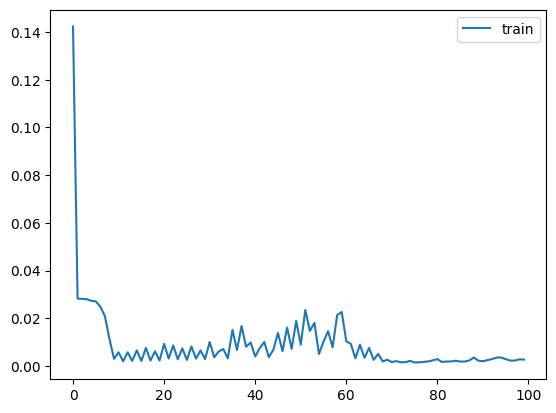

In [ ]:
# Revisamos algunos parametros de ajuste del modelo!
plt.plot(history.history['loss'], label='train')
plt.legend();
plt.show()

In [ ]:
# Predecimos sobre la data de test!
y_pred = model_1.predict(X_test)

4/4 [==============================] - 1s 5ms/step


In [ ]:
(observacion, time_step, nro_variables_independientes)

In [ ]:
# Regresamos la informacion a los valores originales!
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]    # 100 valores reales de test!
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]    # 100 valores pronosticados para validar!
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]  # 1732 valores de entrenamiento!

# **Primera predicción:**


```
time_steps = 1
```



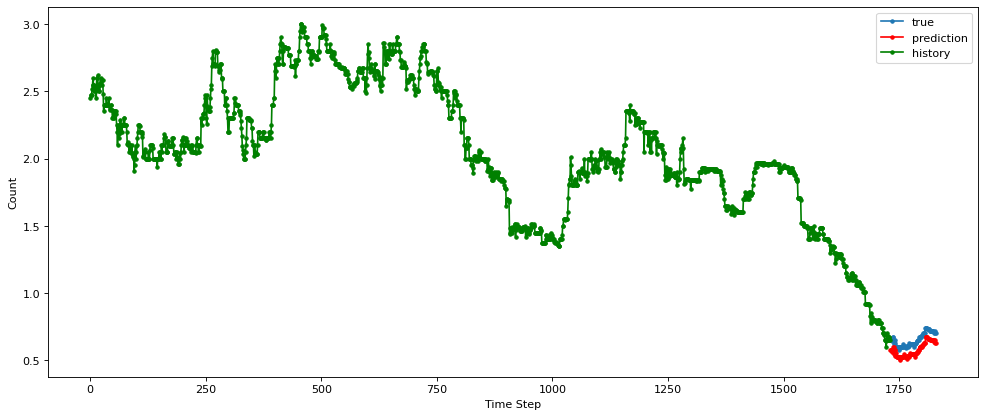

In [ ]:
# Visualizamos los resultados!
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', marker='.', label="history")
plt.ylabel('Count')
plt.xlabel('Time Step')

plt.legend()
plt.show()

In [ ]:
# Vemos algunos indicadores del ajuste!
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

# Definimos y calculamos el MAPE (mean_absolute_percentage_error)
y_test, y_pred = np.array(y_test), np.array(y_pred)
print(f'MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test)) * 100)


RMSE:  0.07564863012526324
MAPE:  12.853838558266656


# **Modelo 02**

In [ ]:
# Tarea:
# Con el objetivo de ser mas preciso con la red neuronal, probar:
# 1) Aumentar el numero de capas ocultas.
# 2) Ir variando el numero de neuronas por capa oculta.
# 3) el dropout midificarlo, dejar inactivas el 20% de las neuronas por capa es demasiado.
# 4) El numero de epoch es poco para entrenar y parametrizar 2 MM de parametros.
# 5) Probar entre 40 y 64 el bach size.

In [ ]:
# Definimos un time_step y procedemos a crear los dataframes!
time_steps = 7 # Porque tengo data diaria y necesito estacionalidad de la semana!

X_train, y_train = create_dataset(train_set_scaled, train_set_scaled.Close , time_steps)
X_test,  y_test  = create_dataset(test_set_scaled,  test_set_scaled.Close, time_steps)

In [ ]:
model_2 = lstm_architecture(X_data=X_train,rate_dropout=0.2)
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 7, 250)            252000    
                                                                 
 dropout_12 (Dropout)        (None, 7, 250)            0         
                                                                 
 lstm_13 (LSTM)              (None, 7, 250)            501000    
                                                                 
 dropout_13 (Dropout)        (None, 7, 250)            0         
                                                                 
 lstm_14 (LSTM)              (None, 7, 250)            501000    
                                                                 
 dropout_14 (Dropout)        (None, 7, 250)            0         
                                                                 
 lstm_15 (LSTM)              (None, 250)              

In [ ]:
# Ejecutamos la RNN!

history = model_2.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    shuffle=False)

print("...")
print('Terminando a las: ', datetime.datetime.now())

Epoch 1/100
54/54 [==============================] - 8s 11ms/step - loss: 0.0498
Epoch 2/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0289
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0325
Epoch 8/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0277
Epoch 9/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 10/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0304
Epoch 11/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 12/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0260
Epoch 13/100
54/54 [===============

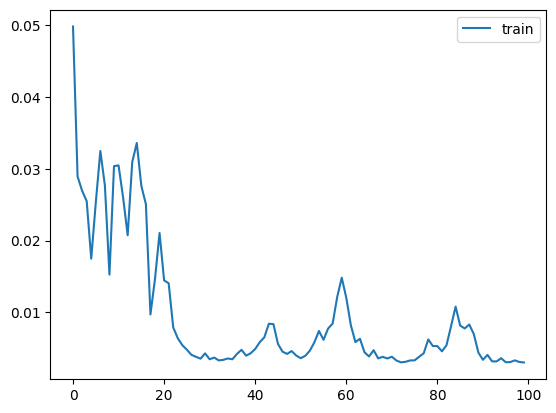

In [ ]:
# Revisamos algunos parametros de ajuste del modelo!
plt.plot(history.history['loss'], label='train')
plt.legend();
plt.show()

# **Segunda predicción:**


```
 time_steps = 7
```







3/3 [==============================] - 2s 6ms/step


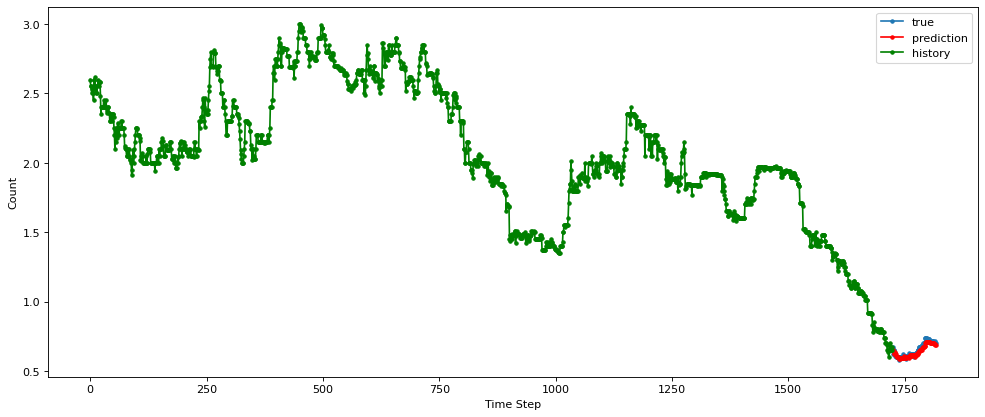

In [ ]:
# Predecimos sobre la data de test!
y_pred = model_2.predict(X_test)

# Regresamos la informacion a los valores originales!
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]    # 100 valores reales de test!
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]    # 100 valores pronosticados para validar!
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]  # 652 valores de entrenamiento!

# Visualizamos los resultados!
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', marker='.', label="history")
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

# Definimos y calculamos el MAPE (mean_absolute_percentage_error)
y_test, y_pred = np.array(y_test), np.array(y_pred)
print(f'MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

RMSE:  0.0185771292304483
MAPE:  7.986948923602736


#**Modelo 03**

In [ ]:
## Probando distintos hiperparámetros

In [ ]:
# Definimos un time_step y procedemos a crear los dataframes!
time_steps = 30 # Porque tengo data diaria y necesito estacionalidad de la semana!

X_train, y_train = create_dataset(train_set_scaled, train_set_scaled.Close , time_steps)
X_test,  y_test  = create_dataset(test_set_scaled,  test_set_scaled.Close, time_steps)

In [ ]:
model_3 = lstm_architecture(X_data=X_train,rate_dropout=0.2)
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30, 250)           252000    
                                                                 
 dropout_16 (Dropout)        (None, 30, 250)           0         
                                                                 
 lstm_17 (LSTM)              (None, 30, 250)           501000    
                                                                 
 dropout_17 (Dropout)        (None, 30, 250)           0         
                                                                 
 lstm_18 (LSTM)              (None, 30, 250)           501000    
                                                                 
 dropout_18 (Dropout)        (None, 30, 250)           0         
                                                                 
 lstm_19 (LSTM)              (None, 250)              

In [ ]:
# Ejecutamos la RNN!

history = model_3.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    shuffle=False)

print("...")
print('Terminando a las: ', datetime.datetime.now())

Epoch 1/100
54/54 [==============================] - 7s 16ms/step - loss: 0.0444
Epoch 2/100
54/54 [==============================] - 1s 15ms/step - loss: 0.0171
Epoch 3/100
54/54 [==============================] - 1s 15ms/step - loss: 0.0200
Epoch 4/100
54/54 [==============================] - 1s 15ms/step - loss: 0.0175
Epoch 5/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0187
Epoch 6/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0211
Epoch 7/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0219
Epoch 8/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0247
Epoch 9/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0326
Epoch 10/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0379
Epoch 11/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0350
Epoch 12/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0380
Epoch 13/100
54/54 [=====

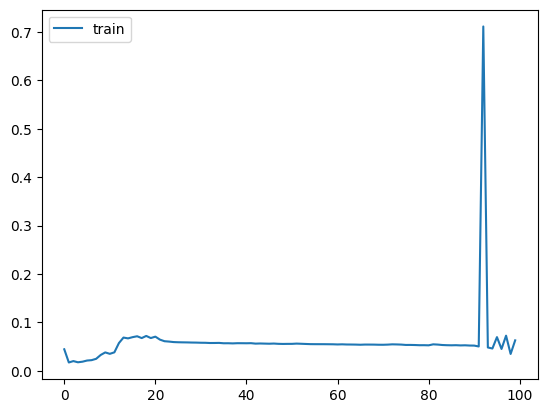

In [ ]:
# Revisamos algunos parametros de ajuste del modelo!
plt.plot(history.history['loss'], label='train')
plt.legend();
plt.show()

# **Tercera predicción:**

```
time_steps = 30
```



3/3 [==============================] - 1s 8ms/step


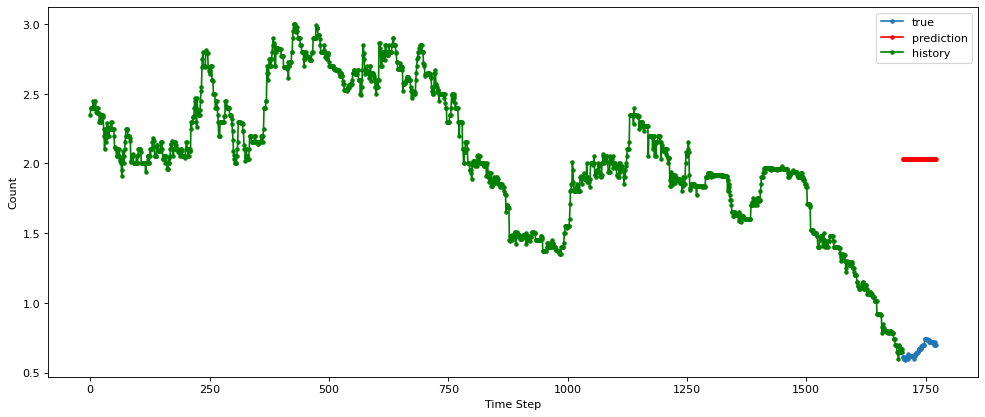

In [ ]:
# Predecimos sobre la data de test!
y_pred = model_3.predict(X_test)

# Regresamos la informacion a los valores originales!
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]    # 100 valores reales de test!
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]    # 100 valores pronosticados para validar!
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]  # 652 valores de entrenamiento!

# Visualizamos los resultados!
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', marker='.', label="history")
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

# Definimos y calculamos el MAPE (mean_absolute_percentage_error)
y_test, y_pred = np.array(y_test), np.array(y_pred)
print(f'MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

RMSE:  1.3649680125657695
MAPE:  206.26324969556435


# **Modelo 4**

In [ ]:
# Feature Engineering

In [ ]:
# Importamos el set de datos!

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DMC/Deep_Learning/Clase 08/RetoAplicacion_TELEFBC1.csv',
                parse_dates=['Date'],
                dayfirst=True,
                index_col='Date')
df

,Close,Volumen
Date,,
2012-01-02,2.45,6622
2012-01-03,2.45,10629
2012-01-04,2.47,1745
2012-01-05,2.47,2543
2012-01-06,2.47,11207
...,...,...
2019-04-24,0.71,43686
2019-04-25,0.70,21271
2019-04-26,0.72,20300


In [ ]:
 #df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
import pandas as pd

# Suponiendo que tienes un DataFrame llamado df con la columna 'Close'
# Crea una copia del DataFrame original
df_copy = df.copy()

# Convierte la columna 'Close' en números en la copia
df_copy['Close'] = pd.to_numeric(df_copy['Close'], errors='coerce')

# Ahora, puedes usar df_copy para trabajar con los datos convertidos


In [ ]:
# Supongamos que tienes un DataFrame llamado df y deseas eliminar la columna 'Volumen'
columna_a_eliminar = 'Volumen'

# Utiliza la función 'drop' para eliminar la columna
df = df_copy.drop(columna_a_eliminar, axis=1)

# En caso de ser necesario ordenamos los registros por fecha.
df.sort_values('Date', inplace=True, ascending=True)


In [ ]:
df

,Close
Date,
2012-01-02,2.45
2012-01-03,2.45
2012-01-04,2.47
2012-01-05,2.47
2012-01-06,2.47
...,...
2019-04-24,0.71
2019-04-25,0.70
2019-04-26,0.72


In [ ]:
ma_day = [3,7]

for ma in ma_day:
    column_name = f"MA({ma})"
    df[column_name] = df['Close'].rolling(ma).mean()
    #test_set_scaled[column_name] = test_set_scaled['Trafico'].rolling(ma).mean()

In [ ]:
df = df.dropna()

In [ ]:
# Hacemos la partición de la data en training y test para una serie de tiempo
train, test = df.iloc[0:-100], df.iloc[-100:len(df)]
print(len(train), len(test))

1726 100


In [ ]:
train.head(10)

,Close,MA(3),MA(7)
Date,,,
2012-01-10,2.55,2.513333,2.482857
2012-01-11,2.60,2.556667,2.504286
2012-01-12,2.55,2.566667,2.518571
2012-01-13,2.55,2.566667,2.530000
2012-01-16,2.50,2.533333,2.534286
2012-01-17,2.53,2.526667,2.542857
2012-01-18,2.50,2.510000,2.540000
2012-01-19,2.50,2.510000,2.532857
2012-01-20,2.45,2.483333,2.511429


In [ ]:
#Escalamos nuestro dataset
train_min = train.min()
train_max = train.max()

train_min,train_max

(Close    0.600000
 MA(3)    0.630000
 MA(7)    0.654286
 dtype: float64,
 Close    3.000000
 MA(3)    3.000000
 MA(7)    2.981429
 dtype: float64)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1726 entries, 2012-01-10 to 2018-12-05
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1726 non-null   float64
 1   MA(3)   1726 non-null   float64
 2   MA(7)   1726 non-null   float64
dtypes: float64(3)
memory usage: 53.9 KB


In [ ]:
train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Close,1726.0,2.056251,0.505065,0.600000,1.830000,2.050000,2.470000,3.000000
MA(3),1726.0,2.057321,0.503381,0.630000,1.836667,2.038333,2.475000,3.000000
MA(7),1726.0,2.059420,0.500315,0.654286,1.835714,2.039286,2.475357,2.981429


In [ ]:
train_set_scaled = (train - train_min)/(train_max - train_min)
test_set_scaled = (test - train_min)/(train_max - train_min)

#Revisamos el escalado
train_set_scaled.head(10)

,Close,MA(3),MA(7)
Date,,,
2012-01-10,0.812500,0.794655,0.785758
2012-01-11,0.833333,0.812940,0.794966
2012-01-12,0.812500,0.817159,0.801105
2012-01-13,0.812500,0.817159,0.806016
2012-01-16,0.791667,0.803094,0.807858
2012-01-17,0.804167,0.800281,0.811541
2012-01-18,0.791667,0.793249,0.810313
2012-01-19,0.791667,0.793249,0.807244
2012-01-20,0.770833,0.781997,0.798036


In [ ]:
# Definimos la funcion de la arquitectura X - y.
def create_dataset_multivariable(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
# Definimos un time_step y procedemos a crear los dataframes!
time_steps = 30 # Porque tengo data diaria y necesito estacionalidad de la semana!

X_train, y_train = create_dataset(train_set_scaled, train_set_scaled.Close , time_steps)
X_test,  y_test  = create_dataset(test_set_scaled,  test_set_scaled.Close, time_steps)

In [ ]:
X_train.shape

(1696, 30, 3)

In [ ]:
model_4 = lstm_architecture(X_data=X_train,rate_dropout=0.2)
model_4.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 30, 250)           254000    
                                                                 
 dropout_20 (Dropout)        (None, 30, 250)           0         
                                                                 
 lstm_21 (LSTM)              (None, 30, 250)           501000    
                                                                 
 dropout_21 (Dropout)        (None, 30, 250)           0         
                                                                 
 lstm_22 (LSTM)              (None, 30, 250)           501000    
                                                                 
 dropout_22 (Dropout)        (None, 30, 250)           0         
                                                                 
 lstm_23 (LSTM)              (None, 250)              

In [ ]:
# Ejecutamos la RNN!
import datetime
history = model_4.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    shuffle=False)

print("...")
print('Terminando a las: ', datetime.datetime.now())

Epoch 1/100
53/53 [==============================] - 8s 14ms/step - loss: 0.0889
Epoch 2/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0233
Epoch 3/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0175
Epoch 4/100
53/53 [==============================] - 1s 10ms/step - loss: 0.0153
Epoch 5/100
53/53 [==============================] - 1s 10ms/step - loss: 0.0126
Epoch 6/100
53/53 [==============================] - 1s 10ms/step - loss: 0.0104
Epoch 7/100
53/53 [==============================] - 1s 10ms/step - loss: 0.0093
Epoch 8/100
53/53 [==============================] - 1s 10ms/step - loss: 0.0088
Epoch 9/100
53/53 [==============================] - 1s 10ms/step - loss: 0.0089
Epoch 10/100
53/53 [==============================] - 1s 10ms/step - loss: 0.0092
Epoch 11/100
53/53 [==============================] - 1s 10ms/step - loss: 0.0104
Epoch 12/100
53/53 [==============================] - 1s 10ms/step - loss: 0.0108
Epoch 13/100
53/53 [=====

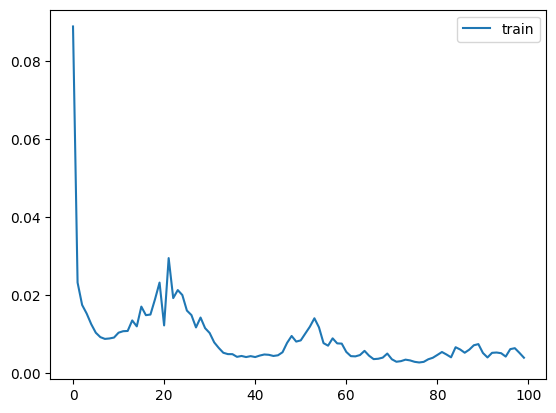

In [ ]:
# Revisamos algunos parametros de ajuste del modelo!
plt.plot(history.history['loss'], label='train')
plt.legend();
plt.show()

# **Cuarta predicción :**


```
time_steps = 30
variables  = 3 { Close,	MA(3)	 y MA(7)}
```



3/3 [==============================] - 2s 8ms/step


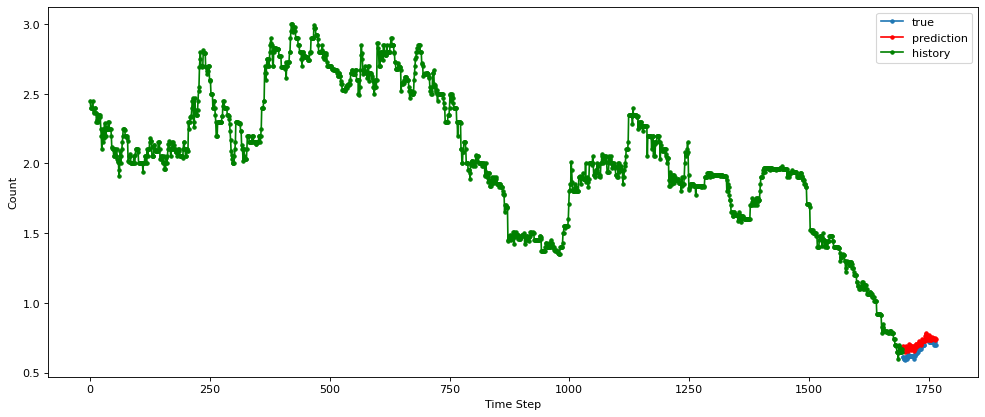

In [ ]:
# Predecimos sobre la data de test!
y_pred = model_4.predict(X_test)

# Regresamos la informacion a los valores originales!
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]    # 100 valores reales de test!
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]    # 100 valores pronosticados para validar!
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]  # 652 valores de entrenamiento!

# Visualizamos los resultados!
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', marker='.', label="history")
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

# Definimos y calculamos el MAPE (mean_absolute_percentage_error)
y_test, y_pred = np.array(y_test), np.array(y_pred)
print(f'MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

RMSE:  0.04857536513991854
MAPE:  9.557391654062167


# **Modelo 05**





In [ ]:
# Importamos el set de datos!

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DMC/Deep_Learning/Clase 08/RetoAplicacion_TELEFBC1.csv',
                parse_dates=['Date'],
                dayfirst=True,
                index_col='Date')
df

,Close,Volumen
Date,,
2012-01-02,2.45,6622
2012-01-03,2.45,10629
2012-01-04,2.47,1745
2012-01-05,2.47,2543
2012-01-06,2.47,11207
...,...,...
2019-04-24,0.71,43686
2019-04-25,0.70,21271
2019-04-26,0.72,20300


In [ ]:
# Supongamos que tienes un DataFrame df con una columna 'Valor'
# Calcula la media y la desviación estándar de la columna 'Valor'
mean = df['Volumen'].mean()
std = df['Volumen'].std()

# Define un umbral (por ejemplo, 3 veces la desviación estándar)
threshold = 3 * std

# Filtra los valores atípicos basados en el umbral
df_sin_outliers = df[abs(df['Volumen'] - mean) <= threshold]


In [ ]:
# Suponiendo que tienes un DataFrame llamado df con la columna 'Close'
# Crea una copia del DataFrame original
df_ = df_sin_outliers.copy()

# Convierte la columna 'Close' en números en la copia
df_['Close'] = pd.to_numeric(df_['Close'], errors='coerce')

# Ahora, puedes usar df_copy para trabajar con los datos convertidos

In [ ]:

# En caso de ser necesario ordenamos los registros por fecha.
df_.sort_values('Date', inplace=True, ascending=True)


In [ ]:
ma_day = [3,7]

for ma in ma_day:
    column_name = f"MA({ma})"
    df_[column_name] = df_['Close'].rolling(ma).mean()
    #test_set_scaled[column_name] = test_set_scaled['Trafico'].rolling(ma).mean()

In [ ]:
df_.head(10)

,Close,Volumen,MA(3),MA(7)
Date,,,,
2012-01-02,2.45,6622,NaN,NaN
2012-01-03,2.45,10629,NaN,NaN
2012-01-04,2.47,1745,2.456667,NaN
2012-01-05,2.47,2543,2.463333,NaN
2012-01-06,2.47,11207,2.470000,NaN
2012-01-09,2.52,38554,2.486667,NaN
2012-01-10,2.55,3039,2.513333,2.482857
2012-01-11,2.60,35946,2.556667,2.504286
2012-01-12,2.55,4304,2.566667,2.518571


In [ ]:
df_new = df_.dropna()
df_new

,Close,Volumen,MA(3),MA(7)
Date,,,,
2012-01-10,2.55,3039,2.513333,2.482857
2012-01-11,2.60,35946,2.556667,2.504286
2012-01-12,2.55,4304,2.566667,2.518571
2012-01-13,2.55,2627,2.566667,2.530000
2012-01-16,2.50,3759,2.533333,2.534286
...,...,...,...,...
2019-04-24,0.71,43686,0.716667,0.718571
2019-04-25,0.70,21271,0.710000,0.715714
2019-04-26,0.72,20300,0.710000,0.715714


In [ ]:
# Hacemos la partición de la data en training y test para una serie de tiempo
train, test = df_new.iloc[0:-100], df_new.iloc[-100:len(df)]
print(len(train), len(test))

1725 100


In [ ]:
#Escalamos nuestro dataset
train_min = train.min()
train_max = train.max()

train_min,train_max

(Close         0.600000
 Volumen    1432.000000
 MA(3)         0.630000
 MA(7)         0.654286
 dtype: float64,
 Close           3.000000
 Volumen    792800.000000
 MA(3)           3.000000
 MA(7)           2.981429
 dtype: float64)

In [ ]:
train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Close,1725.0,2.056110,0.505177,0.600000,1.830000,2.050000,2.470000,3.000000
Volumen,1725.0,16288.464348,35937.622532,1432.000000,4137.000000,7967.000000,17000.000000,792800.000000
MA(3),1725.0,2.057181,0.503496,0.630000,1.836667,2.036667,2.476667,3.000000
MA(7),1725.0,2.059280,0.500427,0.654286,1.835714,2.038571,2.475714,2.981429


In [ ]:
train_set_scaled = (train - train_min)/(train_max - train_min)
test_set_scaled = (test - train_min)/(train_max - train_min)

#Revisamos el escalado
train_set_scaled.head(10)

,Close,Volumen,MA(3),MA(7)
Date,,,,
2012-01-10,0.812500,0.002031,0.794655,0.785758
2012-01-11,0.833333,0.043613,0.812940,0.794966
2012-01-12,0.812500,0.003629,0.817159,0.801105
2012-01-13,0.812500,0.001510,0.817159,0.806016
2012-01-16,0.791667,0.002940,0.803094,0.807858
2012-01-17,0.804167,0.031137,0.800281,0.811541
2012-01-18,0.791667,0.023456,0.793249,0.810313
2012-01-19,0.791667,0.012313,0.793249,0.807244
2012-01-20,0.770833,0.005151,0.781997,0.798036


In [ ]:
# Definimos la funcion de la arquitectura X - y.
def create_dataset_multivariable(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
# Definimos un time_step y procedemos a crear los dataframes!
time_steps = 30 # Porque tengo data diaria y necesito estacionalidad de la semana!

X_train, y_train = create_dataset(train_set_scaled, train_set_scaled.Close , time_steps)
X_test,  y_test  = create_dataset(test_set_scaled,  test_set_scaled.Close, time_steps)

In [ ]:
X_train.shape

(1695, 30, 4)

In [ ]:
model_5 = lstm_architecture(X_data=X_train,rate_dropout=0.2)
model_5.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 30, 250)           255000    
                                                                 
 dropout_40 (Dropout)        (None, 30, 250)           0         
                                                                 
 lstm_41 (LSTM)              (None, 30, 250)           501000    
                                                                 
 dropout_41 (Dropout)        (None, 30, 250)           0         
                                                                 
 lstm_42 (LSTM)              (None, 30, 250)           501000    
                                                                 
 dropout_42 (Dropout)        (None, 30, 250)           0         
                                                                 
 lstm_43 (LSTM)              (None, 250)             

In [ ]:
# Ejecutamos la RNN!
import datetime
history = model_5.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    shuffle=False)

print("...")
print('Terminando a las: ', datetime.datetime.now())

Epoch 1/100
53/53 [==============================] - 7s 14ms/step - loss: 0.0583
Epoch 2/100
53/53 [==============================] - 1s 11ms/step - loss: 0.0122
Epoch 3/100
53/53 [==============================] - 1s 11ms/step - loss: 0.0163
Epoch 4/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0173
Epoch 5/100
53/53 [==============================] - 1s 16ms/step - loss: 0.0191
Epoch 6/100
53/53 [==============================] - 1s 15ms/step - loss: 0.0197
Epoch 7/100
53/53 [==============================] - 1s 15ms/step - loss: 0.0230
Epoch 8/100
53/53 [==============================] - 1s 15ms/step - loss: 0.0269
Epoch 9/100
53/53 [==============================] - 1s 19ms/step - loss: 0.0243
Epoch 10/100
53/53 [==============================] - 1s 12ms/step - loss: 0.0234
Epoch 11/100
53/53 [==============================] - 1s 11ms/step - loss: 0.0356
Epoch 12/100
53/53 [==============================] - 1s 12ms/step - loss: 0.0270
Epoch 13/100
53/53 [=====

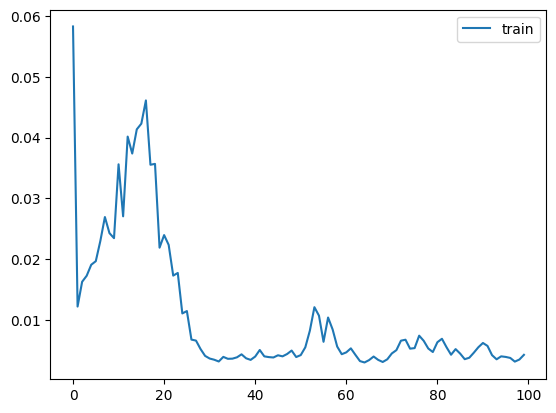

In [ ]:
# Revisamos algunos parametros de ajuste del modelo!
plt.plot(history.history['loss'], label='train')
plt.legend();
plt.show()

# **Quinta predicción**

```
Time _steps = 30
Variables   = 4 {Close	Volumen	MA(3)	MA(7)}
```




3/3 [==============================] - 2s 9ms/step


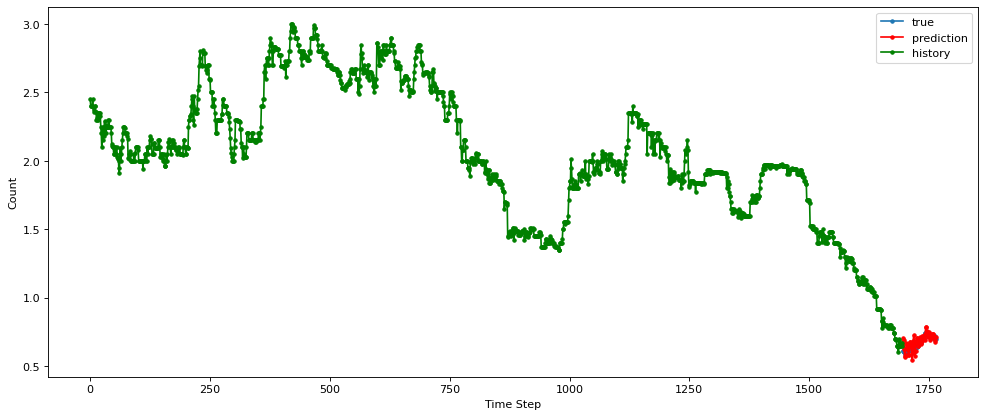

In [ ]:
# Predecimos sobre la data de test!
y_pred = model_5.predict(X_test)

# Regresamos la informacion a los valores originales!
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]    # 100 valores reales de test!
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]    # 100 valores pronosticados para validar!
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]  # 1696 valores de entrenamiento!

# Visualizamos los resultados!
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', marker='.', label="history")
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

# Definimos y calculamos el MAPE (mean_absolute_percentage_error)
y_test, y_pred = np.array(y_test), np.array(y_pred)
print(f'MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

RMSE:  0.03838379714596831
MAPE:  9.163487427104853
